In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
data=pd.read_csv('online_retail.csv')

In [25]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [26]:
print(data)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

             InvoiceDate  UnitPrice  CustomerID         Country  
0       0

In [30]:
print(data.columns)


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [31]:
purchase_data = data['UnitPrice']


In [34]:
numeric_column = 'UnitPrice'  
mean_value = data[numeric_column].mean()
median_value = data[numeric_column].median()
mode_value = data[numeric_column].mode()[0]  print(f"Mean {numeric_column}: {mean_value:.2f}")
print(f"Median {numeric_column}: {median_value:.2f}")
print(f"Mode {numeric_column}: {mode_value:.2f}")


Mean UnitPrice: 4.61
Median UnitPrice: 2.08
Mode UnitPrice: 1.25


In [35]:
def segment_customer(value):
    if value < median_value:
        return 'Low Spender'
    elif median_value <= value <= mean_value:
        return 'Average Spender'
    else:
        return 'High Spender'
data['Customer_Segment'] = data[numeric_column].apply(segment_customer)
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Customer_Segment
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,Average Spender
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,Average Spender
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,Average Spender
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,Average Spender
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,Average Spender


In [36]:
segment_stats = data.groupby('Customer_Segment')[numeric_column].agg(['mean', 'median', 'count']).reset_index()
segment_stats.columns = ['Customer_Segment', 'Mean_Spend', 'Median_Spend', 'Customer_Count']
print(segment_stats)


  Customer_Segment  Mean_Spend  Median_Spend  Customer_Count
0  Average Spender    3.044009          2.95          173774
1     High Spender   15.177613          7.65          112649
2      Low Spender    1.018026          1.25          255486


C:\Users\vatch\AppData\Local\Temp\ipykernel_22720\900945897.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer_Segment', y='Customer_Count', data=segment_stats, palette='viridis')


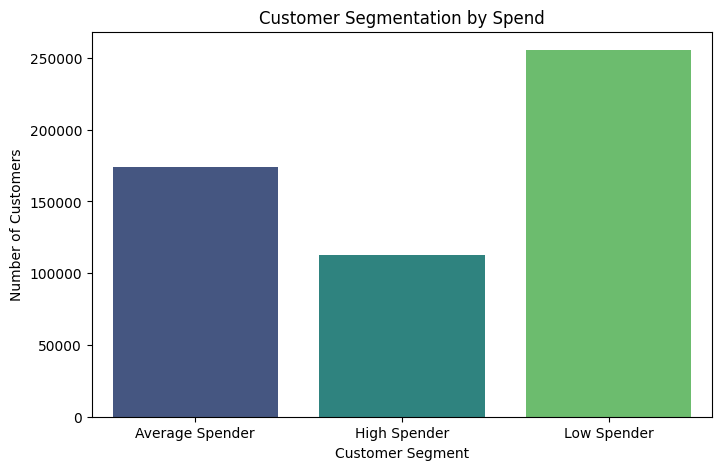

C:\Users\vatch\AppData\Local\Temp\ipykernel_22720\900945897.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Customer_Segment', y=numeric_column, data=data, palette='pastel')


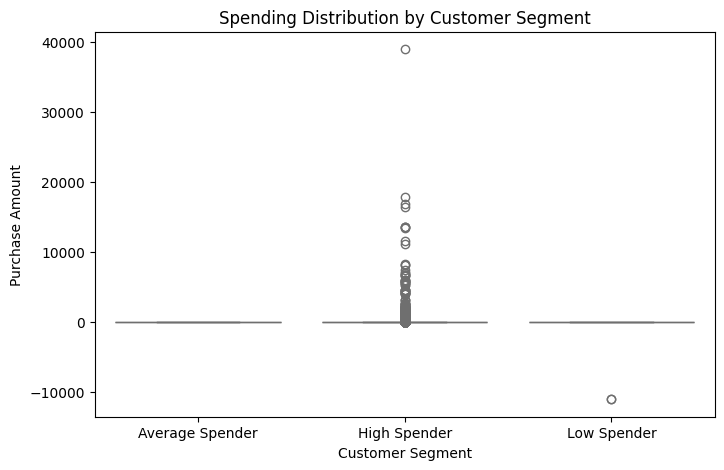

In [46]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Customer_Segment', y='Customer_Count', data=segment_stats, palette='viridis')
plt.title('Customer Segmentation by Spend')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='Customer_Segment', y=numeric_column, data=data, palette='pastel')
plt.title('Spending Distribution by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Purchase Amount')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('online_retail.csv')
data.head()
purchase_data = data['UnitPrice']
data.head()
print(data.columns)
numeric_column = 'UnitPrice'  
mean_value = data[numeric_column].mean()
median_value = data[numeric_column].median()
mode_value = data[numeric_column].mode()[0]  print(f"Mean {numeric_column}: {mean_value:.2f}")
print(f"Median {numeric_column}: {median_value:.2f}")
print(f"Mode {numeric_column}: {mode_value:.2f}")
def segment_customer(value):
    if value < median_value:
        return 'Low Spender'
    elif median_value <= value <= mean_value:
        return 'Average Spender'
    else:
        return 'High Spender'
data['Customer_Segment'] = data[numeric_column].apply(segment_customer)
data.head()
segment_stats = data.groupby('Customer_Segment')[numeric_column].agg(['mean', 'median', 'count']).reset_index()
segment_stats.columns = ['Customer_Segment', 'Mean_Spend', 'Median_Spend', 'Customer_Count']
print(segment_stats)
plt.figure(figsize=(8, 5))
sns.barplot(x='Customer_Segment', y='Customer_Count', data=segment_stats, palette='viridis')
plt.title('Customer Segmentation by Spend')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='Customer_Segment', y=numeric_column, data=data, palette='pastel')
plt.title('Spending Distribution by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Purchase Amount')
plt.show()